## Analysis of 2021 Company Sales Quotation Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
quotes = pd.read_excel('Active Quotation Numbers List 2021.xlsm')

In [3]:
quotes.columns

Index(['QUOTE NO', 'CUSTOMER NAME', 'Contact ID No', 'ORGANISATION',
       'EQUIPMENT', 'DESCRIPTION', 'AGENT', 'COUNTRY', 'VALUE £', 'DATE REC.',
       'DATE QUOTED', 'WHO'],
      dtype='object')

In [4]:
quotes = quotes.drop(['CUSTOMER NAME','Contact ID No','QUOTE NO','ORGANISATION',
                      'DESCRIPTION','AGENT','DATE QUOTED'],axis=1)
quotes.head()

,EQUIPMENT,COUNTRY,VALUE £,DATE REC.,WHO
0,NaN,NaN,NaN,NaN,NaN
1,SMS,Switzerland,9000.0,2021-01-11 00:00:00,CS
2,"HLG, HLP",Netherlands,800.0,2021-01-12 00:00:00,CS
3,FMR Probe,Hong Kong,60000.0,2021-01-12 00:00:00,ZO
4,Low Field CFM,India,NaN,2021-01-13 00:00:00,ZO


In [5]:
quotes = quotes[quotes['VALUE £'].isnull() == False]

In [6]:
quotes['VALUE £'] = quotes['VALUE £'].astype(str)
quotes['VALUE £'] = quotes['VALUE £'].str.extract('(\d+)')
quotes['VALUE £'] = quotes['VALUE £'].astype(int)

In [7]:
quotes.head()

,EQUIPMENT,COUNTRY,VALUE £,DATE REC.,WHO
1,SMS,Switzerland,9000,2021-01-11 00:00:00,CS
2,"HLG, HLP",Netherlands,800,2021-01-12 00:00:00,CS
3,FMR Probe,Hong Kong,60000,2021-01-12 00:00:00,ZO
5,Sumitomo GM F50H maintenance,UK,12000,2021-01-13 00:00:00,TRM
6,CF-VTC for EPR,Italy,108240,2021-01-14 00:00:00,TRM


In [8]:
amount_by_rep = quotes.groupby('WHO')['VALUE £'].sum()

In [9]:
#total value of quotes sent by each sales representative
amount_by_rep.sort_values(ascending=False)

WHO
AK     22678896
TRM    21868682
ZO     18669000
DB      3372953
JAG     1800000
CS       773330
Name: VALUE £, dtype: int32

Text(0,0.5,'Sum of quotes (GBP)')

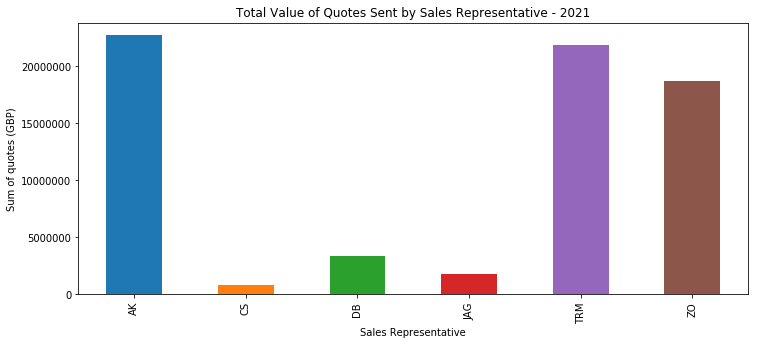

In [10]:
#total value of quotes sent by each sales representative
plt.figure(figsize=(12,5))
amount_by_rep.plot(kind='bar')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Value of Quotes Sent by Sales Representative - 2021')
plt.xlabel('Sales Representative')
plt.ylabel('Sum of quotes (GBP)')

In [11]:
quotes_by_rep = quotes.groupby('WHO')['VALUE £'].count()

In [12]:
#total number of quotes sent by each sales representative
quotes_by_rep.sort_values(ascending=False)

WHO
TRM    143
AK     104
CS      92
ZO      37
DB      28
JAG      2
Name: VALUE £, dtype: int64

Text(0,0.5,'Total Quotes Sent')

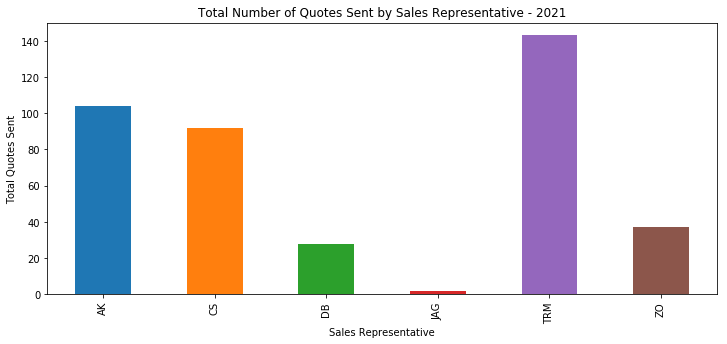

In [13]:
#total number of quotes sent by each sales representative
plt.figure(figsize=(12,5))
quotes_by_rep.plot(kind='bar')
plt.title('Total Number of Quotes Sent by Sales Representative - 2021')
plt.xlabel('Sales Representative')
plt.ylabel('Total Quotes Sent')

In [14]:
quotes.groupby('EQUIPMENT')['VALUE £'].sum().sort_values(ascending = False)

EQUIPMENT
CFMS                                    15373564
SQUID                                   11969000
NMR Magnet                               7137500
Vector Magnet                            4356050
UHV magnet                               1750000
Liquid Cooled Magnet                     1685500
Split-Pair Magnet                        1450000
Neutron Scattering                       1300000
Low Loss Magnet                          1260000
MRI                                      1230000
CFM-iVTI                                  865000
EPR Magnet                                710000
SMS                                       700124
Gyrotron Magnet                           630000
CFM upto 18T                              550000
Optical Magnet System                     465000
Accessories - SQUID                       450000
Mossbauer Magnet                          375000
CF-VTC for EPR                            358240
CFM-RT                                    350000
Accessorie

Text(0,0.5,'Sum of quotes (GBP)')

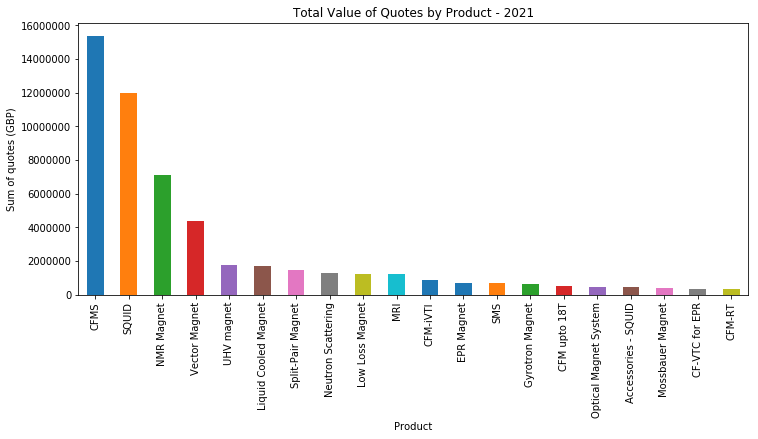

In [15]:
plt.figure(figsize=(12,5))
quotes.groupby('EQUIPMENT')['VALUE £'].sum().sort_values(ascending = False)[:20].plot(kind='bar')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Value of Quotes by Product - 2021')
plt.xlabel('Product')
plt.ylabel('Sum of quotes (GBP)')

Text(0,0.5,'Number of Quotes')

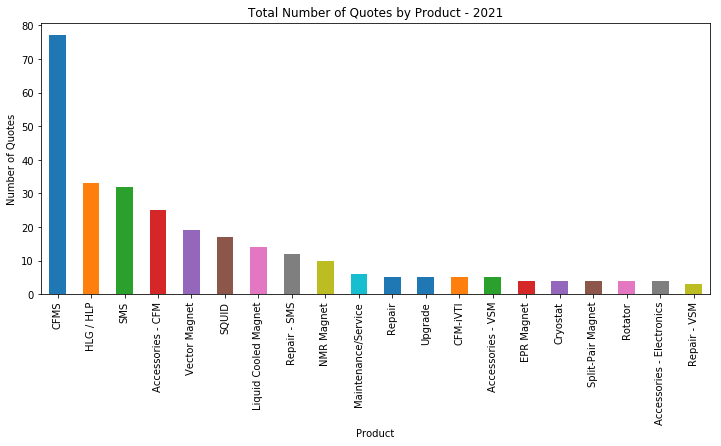

In [16]:
plt.figure(figsize=(12,5))
quotes.groupby('EQUIPMENT')['VALUE £'].count().sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Total Number of Quotes by Product - 2021')
plt.xlabel('Product')
plt.ylabel('Number of Quotes')

In [17]:
quotes.groupby('COUNTRY')['VALUE £'].sum().sort_values(ascending = False)[:20]

COUNTRY
India           14840880
China           11534624
Japan            7399010
Germany          6183835
Russia           3411300
France           3262176
UK               3177840
USA              3155643
Switzerland      2203650
Algeria          1500000
Canada           1133500
Korea, South     1102650
Italy            1021952
Israel            843300
Poland            771841
South Africa      655800
Portugal          550000
Argentina         507000
Ukraine           480000
Sweden            432000
Name: VALUE £, dtype: int32

Text(0,0.5,'Sum of quotes (GBP)')

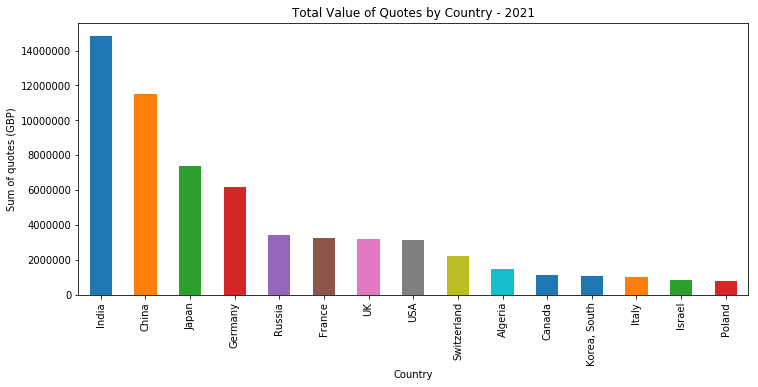

In [18]:
plt.figure(figsize=(12,5))
quotes.groupby('COUNTRY')['VALUE £'].sum().sort_values(ascending = False)[:15].plot(kind='bar')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Value of Quotes by Country - 2021')
plt.xlabel('Country')
plt.ylabel('Sum of quotes (GBP)')

Text(0,0.5,'Total Number of Quotes')

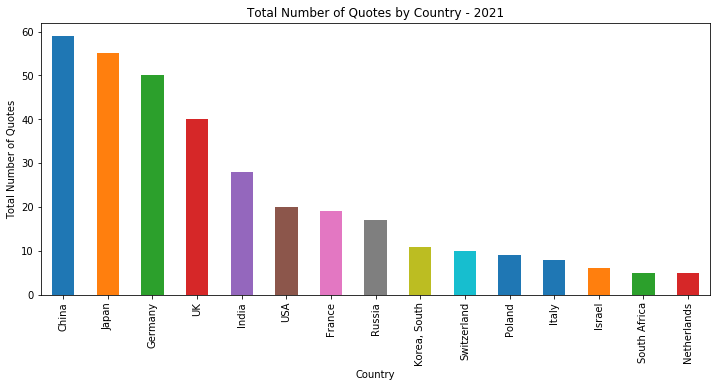

In [19]:
plt.figure(figsize=(12,5))
quotes.groupby('COUNTRY')['VALUE £'].count().sort_values(ascending = False)[:15].plot(kind='bar')
plt.title('Total Number of Quotes by Country - 2021')
plt.xlabel('Country')
plt.ylabel('Total Number of Quotes')